In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier, XGBRFClassifier
import lightgbm as lgb
import pandas as pd
from IPython.display import display



In [3]:
import tensorflow as tf
print(tf.__version__)

2.18.0


## Load dataset


In [4]:
df = pd.read_csv("loan_data.csv")
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
def getinfo(df):
    print("First 5 rows of the data:")
    display(df.sample(10))
    
    print("Shape of the data:")
    display(df.shape)
    
    print("Statistical description of the data")
    display(df.describe())
    
    print("Information of the data")
    display(df.info())
    
    print("Null Values in the data")
    display(df.isna().sum())

    print("Duplicated values are: ")
    if df.duplicated().sum()== 0 :
        print("null ")
    else:
        df.duplicated().sum()    

getinfo(df)    

First 5 rows of the data:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
35348,31.00,male,High School,70760.00,7,RENT,1583.00,DEBTCONSOLIDATION,10.05,0.02,10.00,651,Yes,0
17845,30.00,male,High School,13279.00,6,OWN,5500.00,HOMEIMPROVEMENT,10.36,0.41,8.00,659,No,1
12491,23.00,female,Master,99594.00,3,MORTGAGE,9000.00,PERSONAL,11.01,0.09,2.00,604,Yes,0
6281,25.00,female,Bachelor,39410.00,0,RENT,6000.00,MEDICAL,10.62,0.15,2.00,642,No,1
18078,33.00,male,High School,96697.00,13,RENT,25000.00,MEDICAL,11.86,0.26,8.00,617,No,1
17500,26.00,male,Associate,124473.00,5,MORTGAGE,5000.00,EDUCATION,14.96,0.04,4.00,605,No,0
23264,30.00,female,High School,73772.00,7,MORTGAGE,3000.00,EDUCATION,7.12,0.04,6.00,668,Yes,0
29560,36.00,male,Bachelor,41073.00,12,RENT,13475.00,MEDICAL,15.68,0.33,15.00,669,No,1
41485,35.00,female,Bachelor,241095.00,9,MORTGAGE,3007.00,PERSONAL,7.30,0.01,10.00,611,Yes,0
4231,24.00,male,Associate,42201.00,2,RENT,4500.00,EDUCATION,14.84,0.11,3.00,618,No,1


Shape of the data:


(45000, 14)

Statistical description of the data


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.76,80319.05,5.41,9583.16,11.01,0.14,5.87,632.61,0.22
std,6.05,80422.50,6.06,6314.89,2.98,0.09,3.88,50.44,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,144.00,7200766.00,125.00,35000.00,20.00,0.66,30.00,850.00,1.00


Information of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous

None

Null Values in the data


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Duplicated values are: 
null 


In [6]:
def group_by_cat(df):
    
    num_cols=df.select_dtypes(include=['int', 'float']).columns.to_list()
    cat_cols=df.select_dtypes(include=['object','category']).columns.to_list()
    dt_cols=df.select_dtypes(include=['datetime']).columns.to_list()
    bool_cols=df.select_dtypes(include=['bool']).columns.to_list()
    

    return num_cols,cat_cols,dt_cols,bool_cols


In [7]:
num_cols, cat_cols, dt_cols, bool_cols = group_by_cat(df)

In [8]:
num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

In [9]:
def histogram_num_features(df):
    
    df[num_cols].hist(figsize=(20, 10), bins=50, color='skyblue', edgecolor='black')
    plt.suptitle("Histograms of Numerical Features", fontsize=20)
    plt.show()



In [10]:
def boxplot_num_features(df):
    sns.set(style="whitegrid")
    
    for col in num_cols:
        plt.figure(figsize=(8, 6))
        
        
        sns.boxplot(x=df[col], width=0.5, fliersize=8, palette="Set2", hue=None)
        plt.title(f"Boxplot of {col}", fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Value', fontsize=14)  
        plt.show()


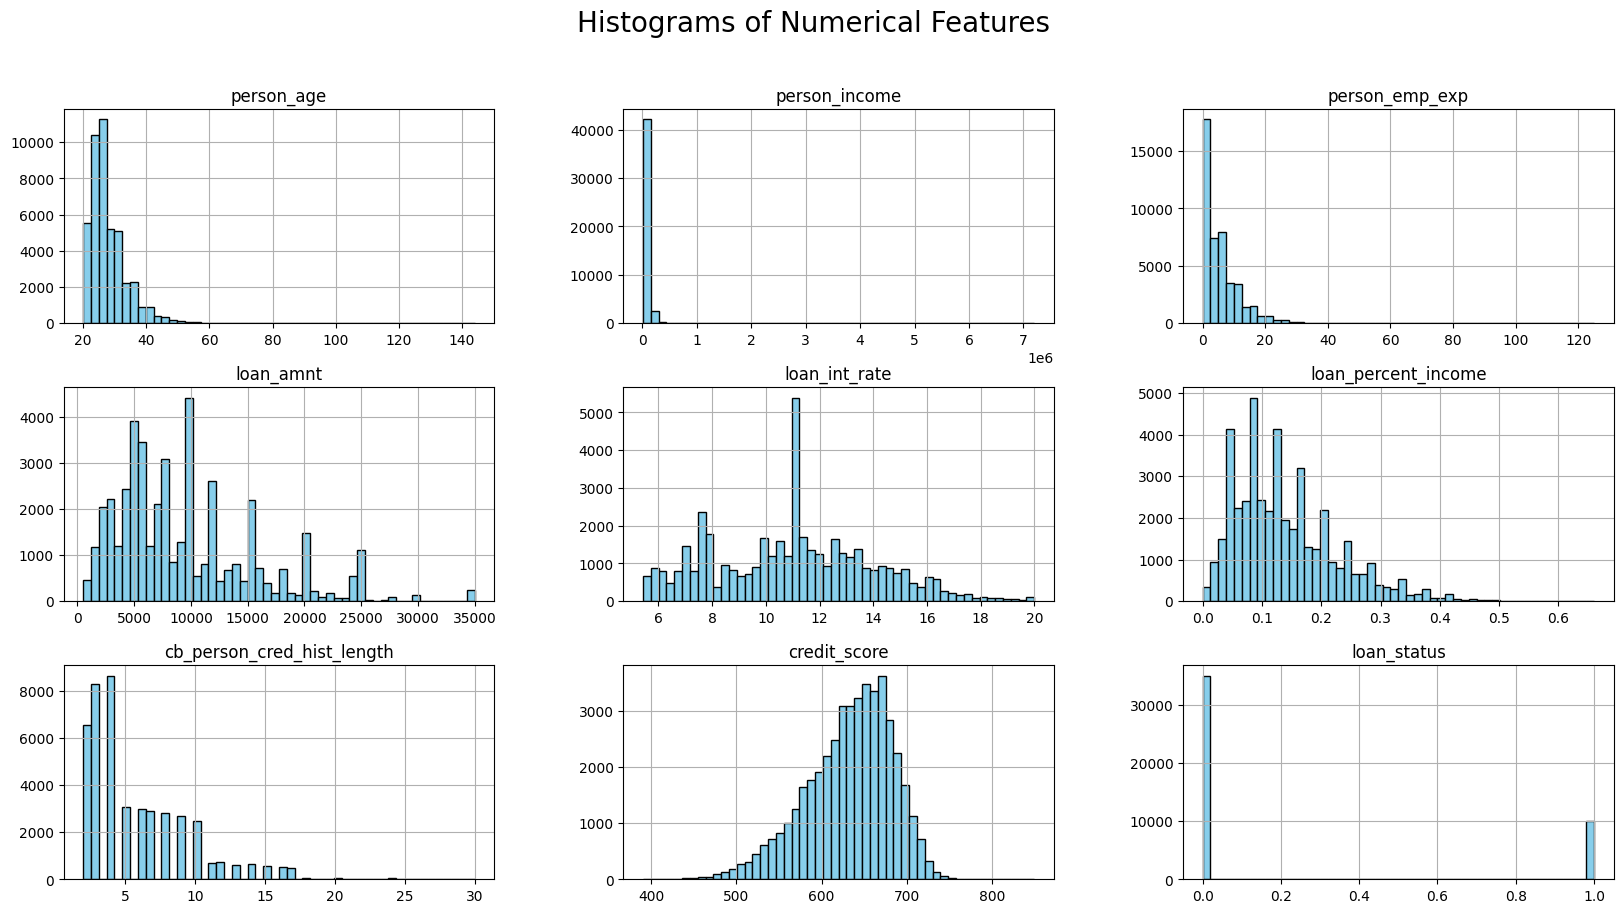

In [11]:
histogram_num_features(df)

C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\3514568899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.5, fliersize=8, palette="Set2", hue=None)


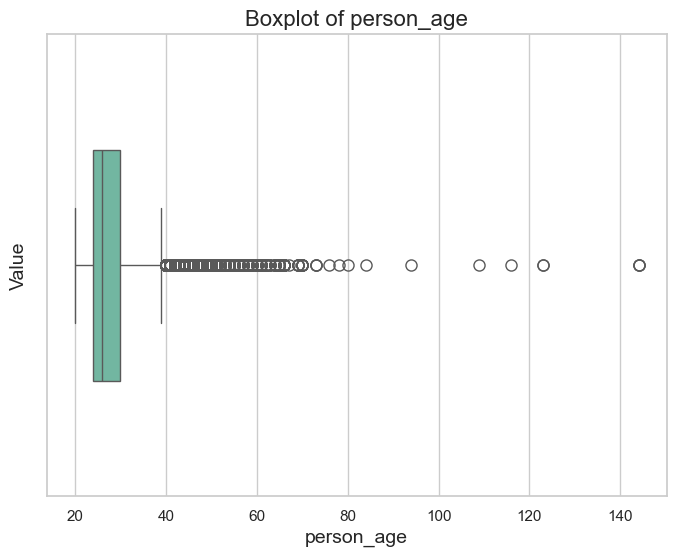

C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\3514568899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.5, fliersize=8, palette="Set2", hue=None)


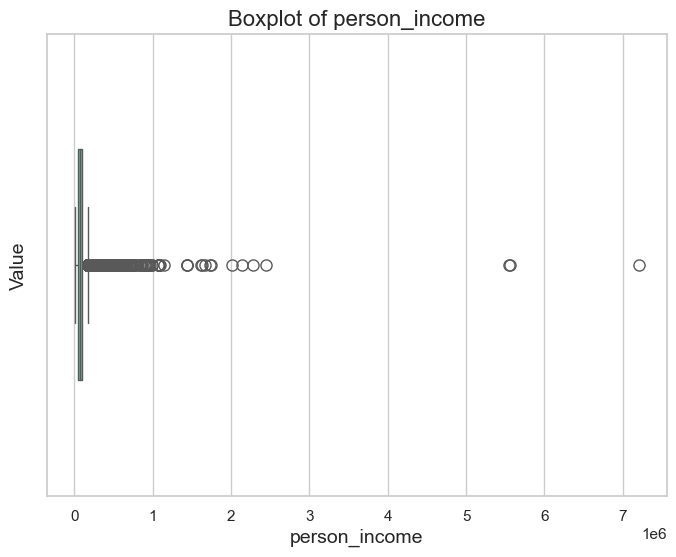

C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\3514568899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.5, fliersize=8, palette="Set2", hue=None)


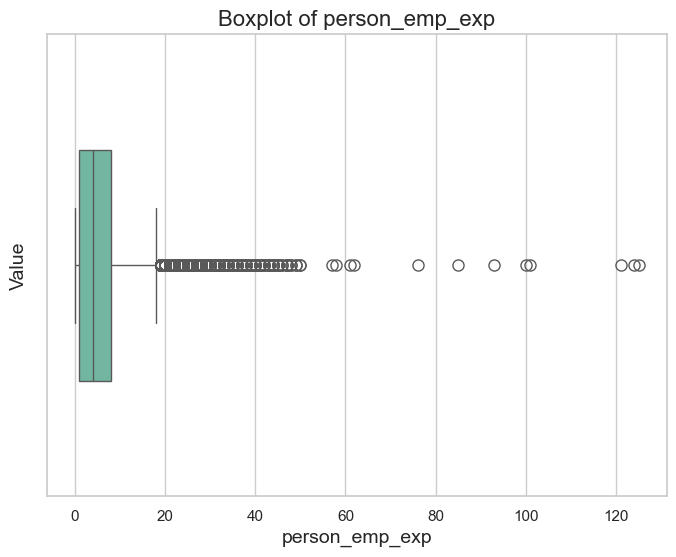

C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\3514568899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.5, fliersize=8, palette="Set2", hue=None)


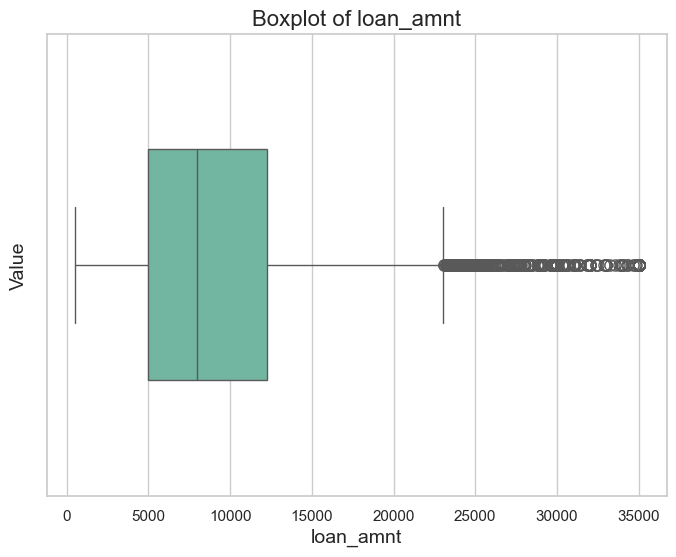

C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\3514568899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.5, fliersize=8, palette="Set2", hue=None)


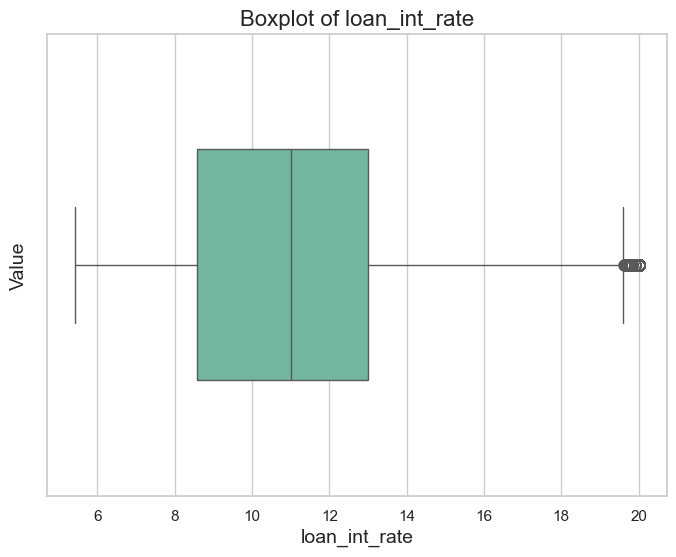

C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\3514568899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.5, fliersize=8, palette="Set2", hue=None)


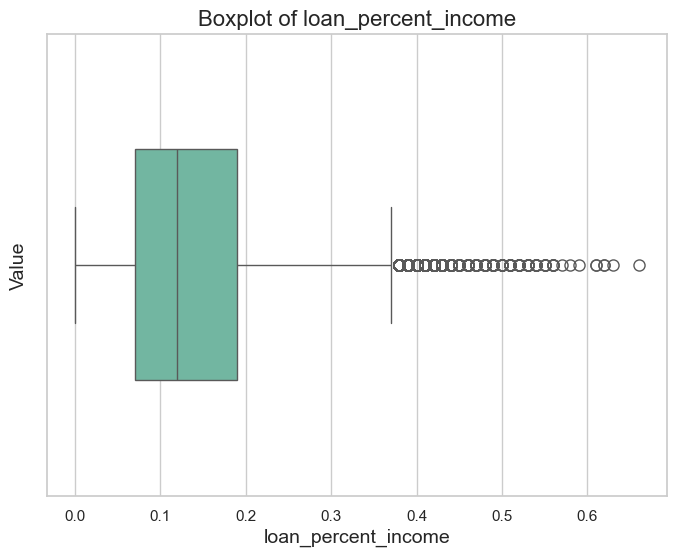

C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\3514568899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.5, fliersize=8, palette="Set2", hue=None)


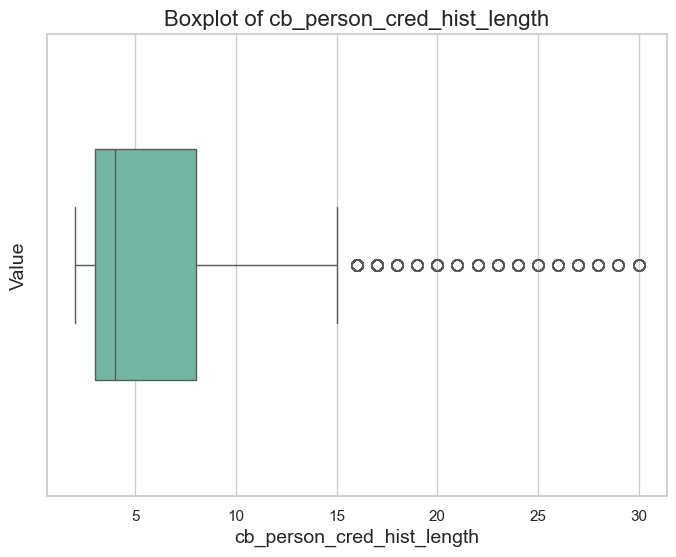

C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\3514568899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.5, fliersize=8, palette="Set2", hue=None)


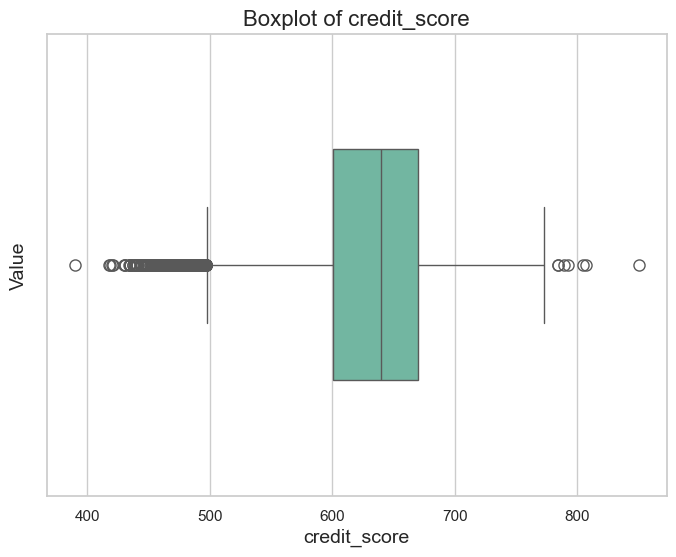

C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\3514568899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.5, fliersize=8, palette="Set2", hue=None)


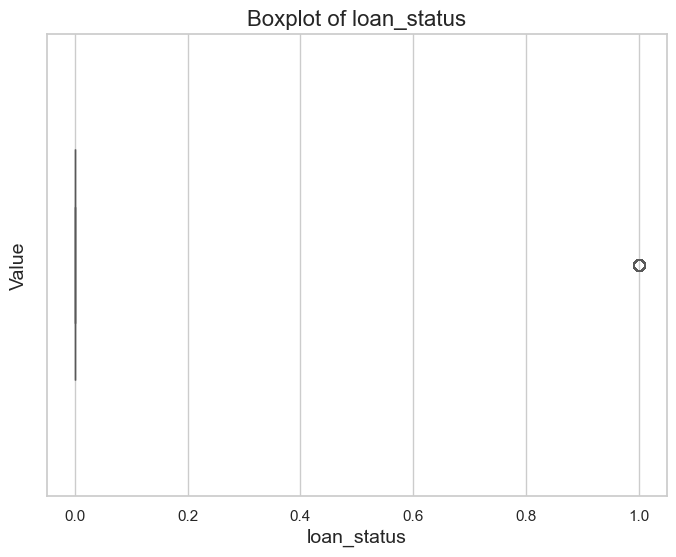

In [12]:
boxplot_num_features(df)

In [13]:
df['person_income'].median()

67048.0

In [14]:
df= df[df['person_age']<=70]
df = df[df['person_income']<=190000]
df = df[df['person_emp_exp']<=50]
df= df[df['credit_score']>=570]
df= df[df['credit_score']<=780]
df.shape

(38300, 14)

In [15]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
2,25.00,female,High School,12438.00,3,MORTGAGE,5500.00,MEDICAL,12.87,0.44,3.00,635,No,1
3,23.00,female,Bachelor,79753.00,0,RENT,35000.00,MEDICAL,15.23,0.44,2.00,675,No,1
4,24.00,male,Master,66135.00,1,RENT,35000.00,MEDICAL,14.27,0.53,4.00,586,No,1
6,26.00,female,Bachelor,93471.00,1,RENT,35000.00,EDUCATION,12.42,0.37,3.00,701,No,1
7,24.00,female,High School,95550.00,5,RENT,35000.00,MEDICAL,11.11,0.37,4.00,585,No,1


In [16]:
df[num_cols].corr()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.00,0.09,0.95,0.04,0.01,-0.02,0.88,0.18,-0.02
person_income,0.09,1.00,0.08,0.39,-0.03,-0.32,0.07,0.02,-0.25
person_emp_exp,0.95,0.08,1.00,0.04,0.01,-0.02,0.84,0.19,-0.01
loan_amnt,0.04,0.39,0.04,1.00,0.14,0.65,0.03,0.01,0.13
loan_int_rate,0.01,-0.03,0.01,0.14,1.00,0.13,0.02,0.01,0.34
loan_percent_income,-0.02,-0.32,-0.02,0.65,0.13,1.00,-0.01,-0.01,0.39
cb_person_cred_hist_length,0.88,0.07,0.84,0.03,0.02,-0.01,1.00,0.16,-0.01
credit_score,0.18,0.02,0.19,0.01,0.01,-0.01,0.16,1.00,-0.01
loan_status,-0.02,-0.25,-0.01,0.13,0.34,0.39,-0.01,-0.01,1.00


In [17]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [18]:
def val_count(df, cat_cols):
    for col in cat_cols:
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
        print("\n")  

val_count(df,cat_cols)

Value counts for person_gender:
person_gender
male      21091
female    17209
Name: count, dtype: int64


Value counts for person_education:
person_education
Bachelor       11702
Associate      10108
High School     9689
Master          6234
Doctorate        567
Name: count, dtype: int64


Value counts for person_home_ownership:
person_home_ownership
RENT        20335
MORTGAGE    15344
OWN          2527
OTHER          94
Name: count, dtype: int64


Value counts for loan_intent:
loan_intent
EDUCATION            7805
MEDICAL              7353
VENTURE              6651
PERSONAL             6415
DEBTCONSOLIDATION    6010
HOMEIMPROVEMENT      4066
Name: count, dtype: int64


Value counts for previous_loan_defaults_on_file:
previous_loan_defaults_on_file
No     19807
Yes    18493
Name: count, dtype: int64




In [19]:
def cat_to_numeric(df, cat_cols):
    for col in cat_cols:
        if len(df[col].unique()) == 2:
            df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})
        else:
            df = pd.get_dummies(df, columns=[col], drop_first=True)
            df = df.applymap(lambda x: 1 if x == True else (0 if x == False else x))
            

    return df
 

In [20]:
df = cat_to_numeric(df, cat_cols)


C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\2197778768.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == True else (0 if x == False else x))
C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\2197778768.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == True else (0 if x == False else x))
C:\Users\Ahmed Malik\AppData\Local\Temp\ipykernel_4240\2197778768.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == True else (0 if x == False else x))


In [21]:

df['experience_age_interaction'] = df['person_age'] * df['person_emp_exp']
df['loan_to_income'] = df['loan_amnt'] / df['person_income']


In [22]:
df['loan_status'].value_counts()

loan_status
0    29657
1     8643
Name: count, dtype: int64

In [23]:
df.corr()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,experience_age_interaction,loan_to_income
person_age,1.00,0.02,0.09,0.95,0.04,0.01,-0.02,0.88,0.18,-0.02,...,-0.01,-0.00,-0.03,-0.08,0.07,0.02,0.03,-0.01,0.94,-0.02
person_gender,0.02,1.00,0.02,0.01,0.01,0.01,-0.00,0.01,0.01,0.00,...,0.00,0.00,-0.00,-0.00,0.01,-0.01,-0.00,0.00,0.02,-0.00
person_income,0.09,0.02,1.00,0.08,0.39,-0.03,-0.32,0.07,0.02,0.12,...,0.00,-0.08,-0.32,-0.01,0.08,-0.08,0.01,0.00,0.06,-0.32
person_emp_exp,0.95,0.01,0.08,1.00,0.04,0.01,-0.02,0.84,0.19,-0.02,...,-0.00,0.00,-0.03,-0.07,0.06,0.01,0.03,-0.01,0.97,-0.02
loan_amnt,0.04,0.01,0.39,0.04,1.00,0.14,0.65,0.03,0.01,-0.07,...,0.01,-0.03,-0.12,-0.00,0.04,-0.04,0.00,0.00,0.03,0.65
loan_int_rate,0.01,0.01,-0.03,0.01,0.14,1.00,0.13,0.02,0.01,-0.18,...,0.02,-0.02,0.14,-0.01,0.02,0.01,-0.00,-0.02,0.01,0.13
loan_percent_income,-0.02,-0.00,-0.32,-0.02,0.65,0.13,1.00,-0.01,-0.01,-0.20,...,0.01,0.05,0.11,-0.00,-0.01,0.01,-0.01,0.00,-0.01,1.00
cb_person_cred_hist_length,0.88,0.01,0.07,0.84,0.03,0.02,-0.01,1.00,0.16,-0.02,...,-0.01,0.00,-0.02,-0.07,0.06,0.01,0.03,-0.01,0.82,-0.02
credit_score,0.18,0.01,0.02,0.19,0.01,0.01,-0.01,0.16,1.00,-0.14,...,-0.01,-0.01,-0.00,-0.01,0.01,0.00,0.00,0.00,0.18,-0.01
previous_loan_defaults_on_file,-0.02,0.00,0.12,-0.02,-0.07,-0.18,-0.20,-0.02,-0.14,1.00,...,-0.00,0.05,-0.13,0.04,-0.02,-0.03,0.00,0.05,-0.03,-0.20


<Axes: >

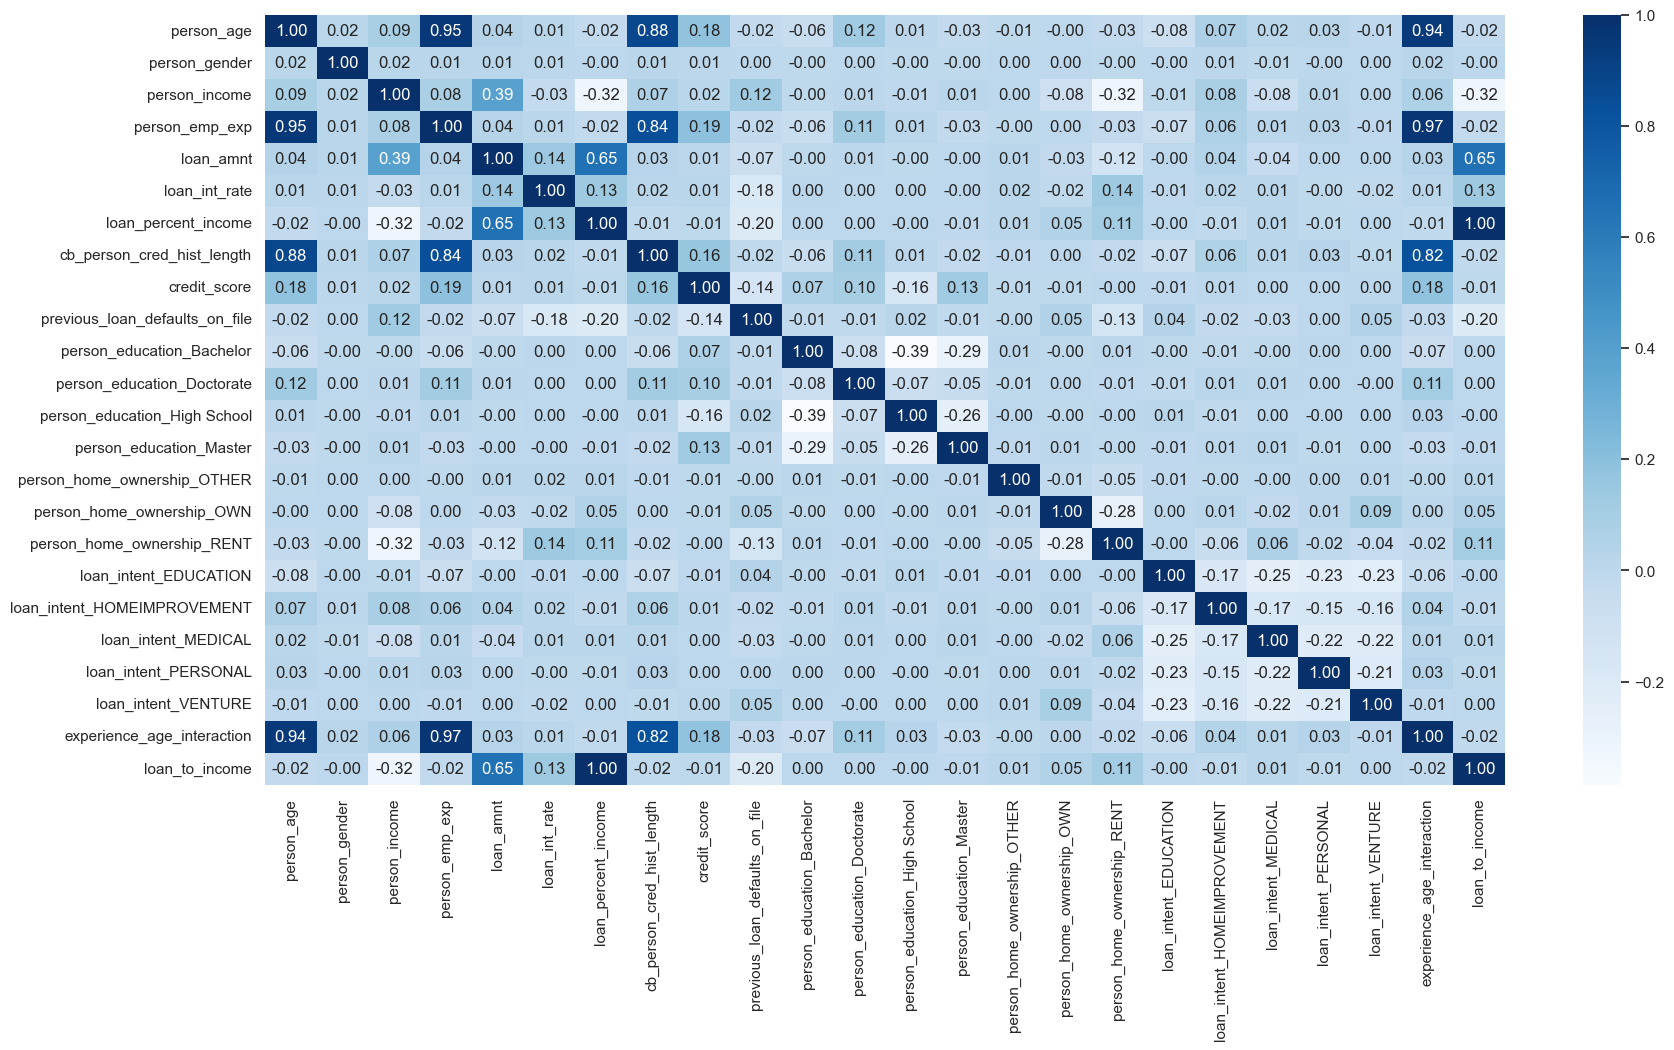

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop(['loan_status'],axis=1).corr(), annot=True, cmap='Blues', fmt='.2f')

In [25]:
df.columns

Index(['person_age', 'person_gender', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'experience_age_interaction', 'loan_to_income'],
      dtype='object')

In [26]:
x= df.drop(columns=["loan_status"])
y= df["loan_status"]

In [27]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# base_model = LogisticRegression(random_state=42, max_iter=1000)

# rfe = RFE(estimator=base_model, n_features_to_select= 17)
# rfe.fit(x,y)
# rfe_features = x.columns[rfe.support_].to_list()

# rfe_selected_features = pd.DataFrame({'feature' : rfe_features, 'RFE' : True})
# rfe_selected_features

In [28]:
selected_features = [
    'person_gender', 'loan_int_rate', 'loan_percent_income', 'credit_score', 
    'previous_loan_defaults_on_file', 'person_education_Bachelor', 
    'person_education_Doctorate', 'person_education_High School', 
    'person_education_Master', 'person_home_ownership_OTHER', 
    'person_home_ownership_OWN', 'person_home_ownership_RENT', 
    'loan_intent_EDUCATION', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 
    'loan_intent_VENTURE', 'loan_to_income'
]
x = x[selected_features]


x


,person_gender,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_to_income
2,0,12.87,0.44,635,0,0,0,1,0,0,0,0,0,1,0,0,0.44
3,0,15.23,0.44,675,0,1,0,0,0,0,0,1,0,1,0,0,0.44
4,1,14.27,0.53,586,0,0,0,0,1,0,0,1,0,1,0,0,0.53
6,0,12.42,0.37,701,0,1,0,0,0,0,0,1,1,0,0,0,0.37
7,0,11.11,0.37,585,0,0,0,1,0,0,0,1,0,1,0,0,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,1,15.66,0.31,645,0,0,0,0,0,0,0,1,0,1,0,0,0.31
44996,0,14.07,0.14,621,0,0,0,0,0,0,0,1,0,0,0,0,0.14
44997,1,10.02,0.05,668,0,0,0,0,0,0,0,1,0,0,0,0,0.05
44998,1,13.23,0.36,604,0,1,0,0,0,0,0,1,1,0,0,0,0.36


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape
y_test.shape

(7660,)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [31]:

print(x_test_scaled.shape)


(7660, 17)


In [32]:
def check_all_models(X_train_scaled, X_test_scaled, y_train, y_test):
    models = {
            'Logistic Regression': LogisticRegression(),
            'K-Nearest Neighbors': KNeighborsClassifier(),
            'Naive Bayes': GaussianNB(),
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'Support Vector Machine': SVC(probability=True),
            'Gradient Boosting': GradientBoostingClassifier(),
            'AdaBoost': AdaBoostClassifier(),
            'XGBoost': XGBClassifier(),
            'XGBoostRandomForest': XGBRFClassifier(),
           
           
        }

    results = []

    for name, model in models.items():
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
        y_prob = model.predict_proba(x_test_scaled)[:,1]
        test_acc = accuracy_score(y_test, y_pred)
        test_prec = precision_score(y_test, y_pred, average='weighted')
        test_rec = recall_score(y_test, y_pred, average='weighted')
        test_f1 = f1_score(y_test, y_pred, average='weighted')
        test_auc = roc_auc_score(y_test, y_prob)

        results.append({
            'Model' : name,
            'Test Accuracy' : test_acc,
            'Test Precision' : test_prec,
            'Test Recall' : test_rec,
            'Test F1-Score' : test_f1,
            'Test AUC Score' : test_auc
        })

    model_results_df = pd.DataFrame(results)
    display(model_results_df)

In [33]:
check_all_models(x_train_scaled, x_test_scaled, y_train, y_test )

,Model,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Test AUC Score
0,Logistic Regression,0.88,0.88,0.88,0.88,0.94
1,K-Nearest Neighbors,0.88,0.88,0.88,0.88,0.91
2,Naive Bayes,0.73,0.87,0.73,0.75,0.93
3,Decision Tree,0.87,0.87,0.87,0.87,0.81
4,Random Forest,0.90,0.89,0.90,0.89,0.95
5,Support Vector Machine,0.90,0.90,0.90,0.90,0.95
6,Gradient Boosting,0.90,0.90,0.90,0.90,0.95
7,AdaBoost,0.89,0.89,0.89,0.89,0.95
8,XGBoost,0.90,0.90,0.90,0.90,0.95
9,XGBoostRandomForest,0.90,0.89,0.90,0.89,0.95


In [34]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV



xgb_model = XGBClassifier()

# Define parameter grid
param_dist = {
    'n_estimators': [400, 405, 395, 410, 390, 414, 385],  
    'learning_rate': [0.1, 0.09, 0.08, 0.11, 0.12, 0.13],                        
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],                              
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],                 
    'subsample': [0.6, 0.57, 0.58, 0.59, 0.61, 0.62, 0.63, 0.64],                         
    'colsample_bytree': [0.6, 0.57, 0.58, 0.59, 0.61, 0.62, 0.63, 0.64],                  
    'gamma': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5],      
    'scale_pos_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],                 
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train_scaled, y_train)

# Print best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.63, 'scale_pos_weight': 1, 'n_estimators': 410, 'min_child_weight': 6, 'max_depth': 6, 'learning_rate': 0.13, 'gamma': 1.3, 'colsample_bytree': 0.57}


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Model Parameters:",best_params)

y_pred = best_model.predict(x_test_scaled)
y_proba = best_model.predict_proba(x_test_scaled)[:,1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Model Parameters: {'subsample': 0.63, 'scale_pos_weight': 1, 'n_estimators': 410, 'min_child_weight': 6, 'max_depth': 6, 'learning_rate': 0.13, 'gamma': 1.3, 'colsample_bytree': 0.57}

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5931
           1       0.83      0.69      0.76      1729

    accuracy                           0.90      7660
   macro avg       0.87      0.83      0.85      7660
weighted avg       0.90      0.90      0.90      7660


Confusion Matrix:
[[5694  237]
 [ 532 1197]]


In [36]:
best_model.save_model("XGB_Best")

C:\Users\Ahmed Malik\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:28:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [37]:
import pandas as pd
import numpy as np

 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset (replace with your actual dataset)
# df = pd.read_csv('your_dataset.csv')


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=x_train_scaled.shape[1]),
    tf.keras.layers.BatchNormalization(),  # Batch Normalization
    tf.keras.layers.Dropout(0.5),



    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Batch Normalization
    tf.keras.layers.Dropout(0.2),



    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(x_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Make predictions
y_pred = model.predict(x_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred_binary))
print(confusion_matrix(y_test, y_pred_binary))


c:\Users\Ahmed Malik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8043 - loss: 0.4111 - val_accuracy: 0.8894 - val_loss: 0.2415
Epoch 2/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8754 - loss: 0.2768 - val_accuracy: 0.8969 - val_loss: 0.2295
Epoch 3/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8840 - loss: 0.2522 - val_accuracy: 0.8982 - val_loss: 0.2263
Epoch 4/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8850 - loss: 0.2480 - val_accuracy: 0.9003 - val_loss: 0.2219
Epoch 5/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8915 - loss: 0.2420 - val_accuracy: 0.8986 - val_loss: 0.2227
Epoch 6/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8915 - loss: 0.2399 - val_accuracy: 0.9021 - val_loss: 0.2192
Epoch 7/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8913 - loss: 0.2380 - val_accuracy: 0.9007 - val_loss: 0.2204
Epoch 8/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8939 - loss: 0.2332 - val_accuracy: 0.